In [45]:
import numpy as np
import pandas as pd
import torch as th
from tsai.all import *
computer_setup()

os             : Linux-5.3.0-40-generic-x86_64-with-glibc2.10
python         : 3.8.2
tsai           : 0.3.1
fastai         : 2.6.0
fastcore       : 1.4.2
torch          : 1.11.0+cu102
device         : 1 gpu (['TITAN RTX'])
cpu cores      : 16
RAM            : 62.75 GB
GPU memory     : [23.65] GB


In [30]:
# X = np.load('usa_3d.npy')
X = np.load('usa_3d_scale_minmax.npy')
y = np.load('usa_3d_class.npy')
print(X.shape, y.shape)

(1819, 100, 14) (181900,)


In [31]:
x_train, x_val = X[:1455,:, :], X[1455:,:, :]

In [32]:
splits = get_predefined_splits(x_train,x_val)

## InceptionTime

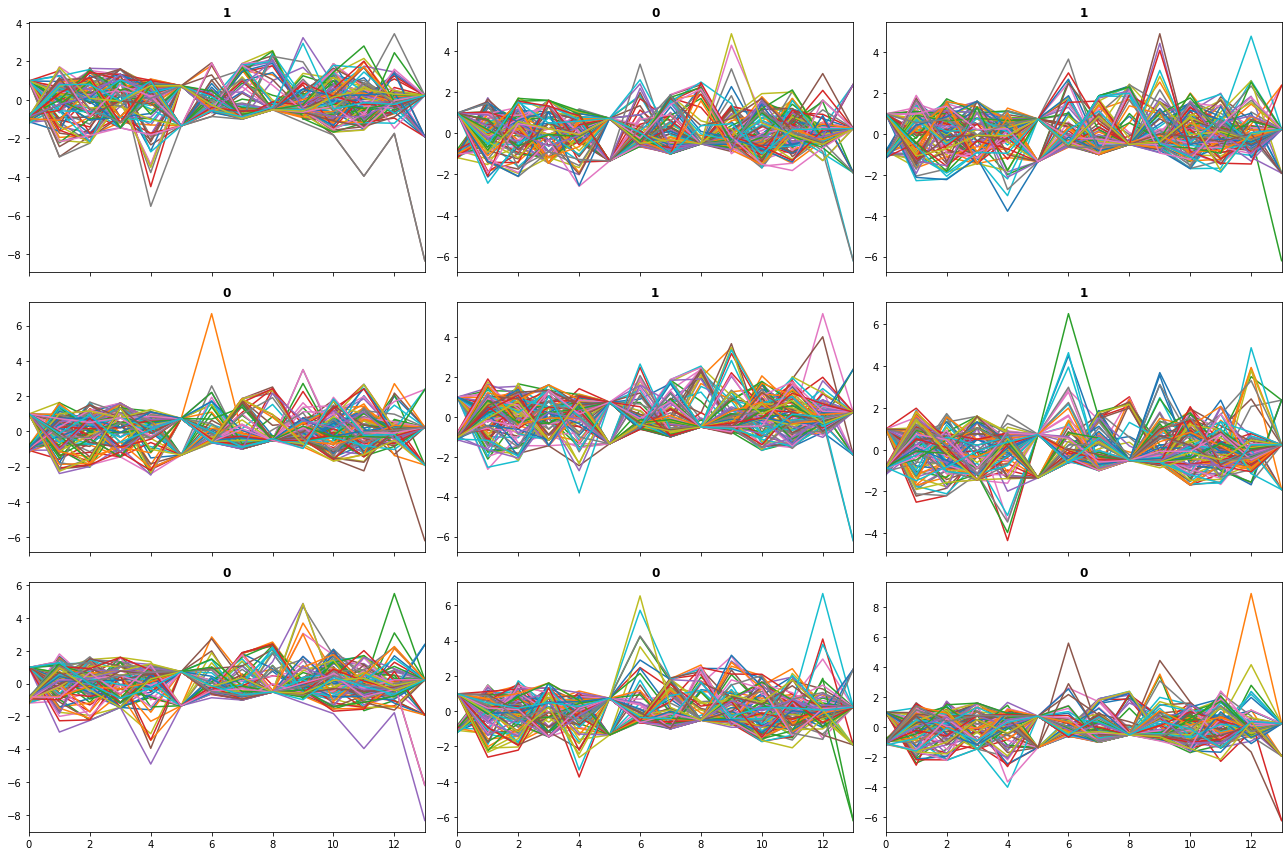

In [36]:
bs = 64
n_epochs = 100
tfms  = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)
dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=bs, batch_tfms=TSStandardize())
dls.show_batch()

SuggestedLRs(valley=0.0003311311302240938)

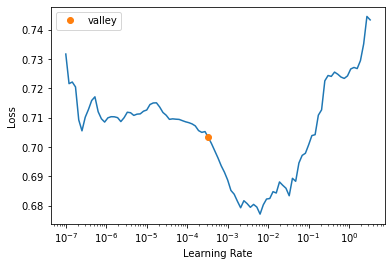

In [37]:
model = InceptionTime(dls.vars, dls.c)
learn = Learner(dls, model, metrics=[RocAucBinary(), accuracy], cbs=ShowGraphCallback2())
learn.lr_find()

epoch,train_loss,valid_loss,roc_auc_score,accuracy,time
0,0.708171,0.693411,0.518863,0.516484,00:00
1,0.681411,0.698083,0.517981,0.497253,00:00
2,0.654782,0.705453,0.502769,0.505495,00:00
3,0.618652,0.720987,0.498114,0.505495,00:00
4,0.559558,0.825796,0.502038,0.464286,00:00
5,0.457301,0.935909,0.510801,0.489011,00:00
6,0.339484,0.929845,0.535779,0.532967,00:00
7,0.244511,0.978626,0.545211,0.535714,00:00
8,0.175072,0.950365,0.544055,0.521978,00:00
9,0.125771,0.990046,0.543751,0.535714,00:00


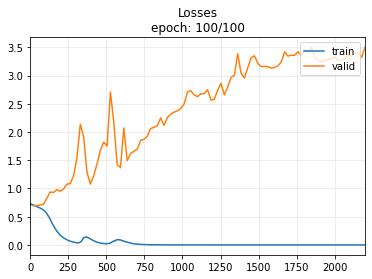

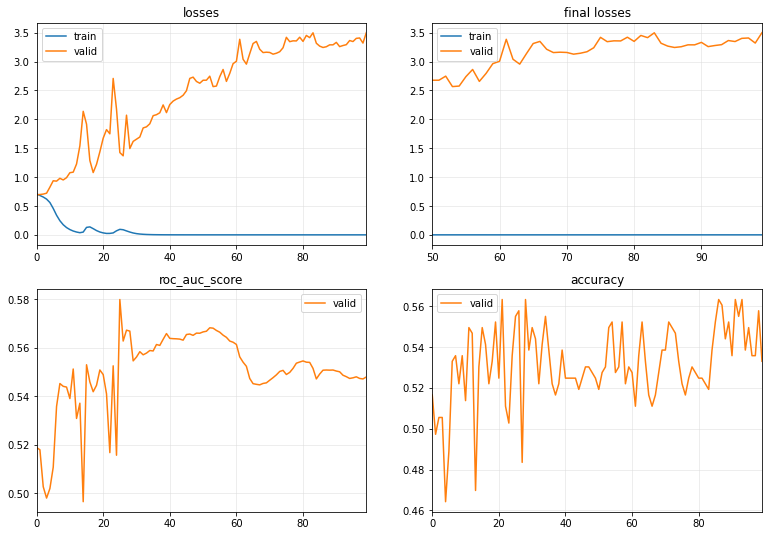


Elapsed time: 71.52935576438904


In [38]:
start = time.time()
learn.fit_one_cycle(n_epochs, lr_max=1e-3)
print('\nElapsed time:', time.time() - start)

## TST

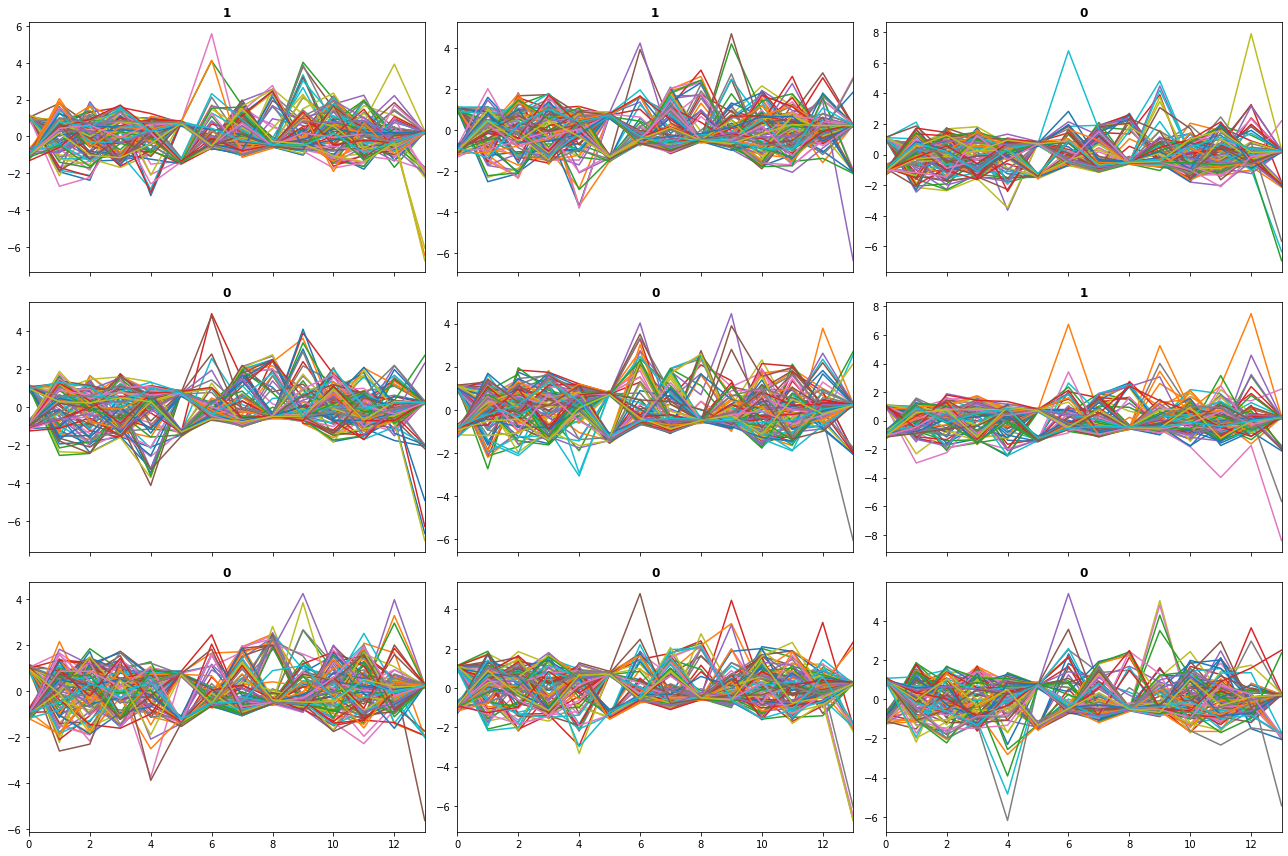

In [40]:
bs = 64
tfms  = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits)
dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=bs, batch_tfms=TSStandardize(by_var=True))
dls.show_batch()

SuggestedLRs(valley=0.0003311311302240938)

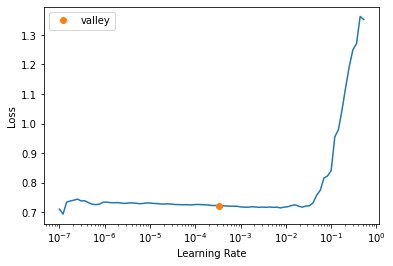

In [41]:
model = TST(dls.vars, dls.c, dls.len)
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropyFlat(), metrics=[RocAucBinary(), accuracy],  cbs=ShowGraphCallback2())
learn.lr_find()

## Base TST

epoch,train_loss,valid_loss,roc_auc_score,accuracy,time
0,0.726468,0.705799,0.518224,0.524725,00:00
1,0.726766,0.707897,0.518164,0.521978,00:00
2,0.722670,0.708163,0.516399,0.521978,00:00
3,0.719671,0.709468,0.513843,0.494505,00:00
4,0.715476,0.711447,0.511683,0.491758,00:00
5,0.710956,0.713012,0.510588,0.491758,00:00
6,0.705875,0.715693,0.506815,0.508242,00:00
7,0.700690,0.716508,0.504472,0.510989,00:00
8,0.695621,0.717337,0.504046,0.510989,00:00
9,0.689154,0.717946,0.503408,0.510989,00:00


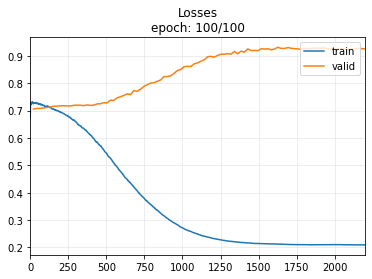

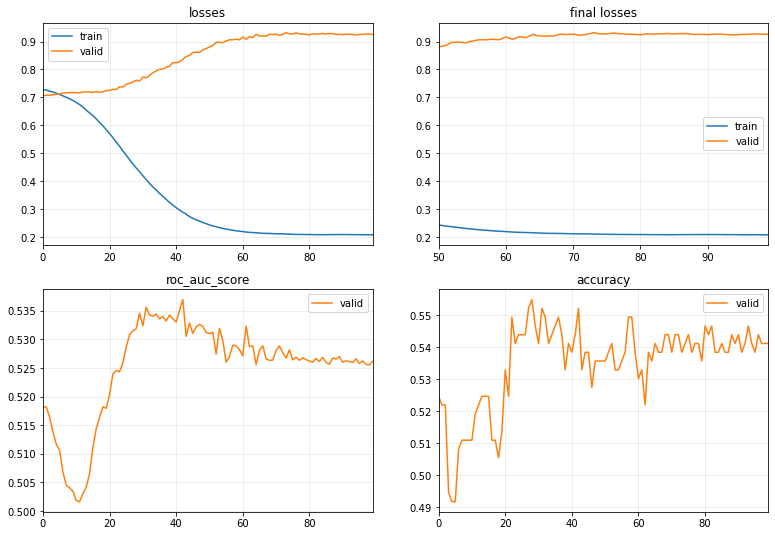


Elapsed time: 69.40162301063538


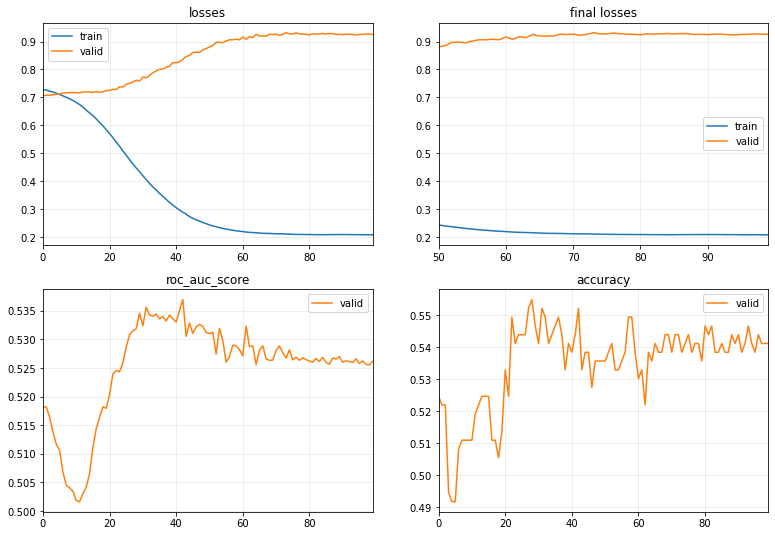

In [35]:
model = TST(dls.vars, dls.c, dls.len)
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropyFlat(), metrics=[RocAucBinary(), accuracy],  cbs=ShowGraphCallback2())
start = time.time()
learn.fit_one_cycle(n_epochs, lr_max=1e-4)
print('\nElapsed time:', time.time() - start)
learn.plot_metrics()

## TST with Dropout

epoch,train_loss,valid_loss,roc_auc_score,accuracy,time
0,0.723257,0.713443,0.514604,0.472527,00:00
1,0.722927,0.710182,0.509523,0.480769,00:00
2,0.717671,0.707107,0.510649,0.502747,00:00
3,0.716256,0.706762,0.506693,0.500000,00:00
4,0.712723,0.705097,0.506724,0.508242,00:00
5,0.712559,0.704007,0.508914,0.508242,00:00
6,0.711178,0.704450,0.507302,0.500000,00:00
7,0.710091,0.703834,0.506252,0.502747,00:00
8,0.709170,0.702372,0.507028,0.497253,00:00
9,0.709891,0.702905,0.504868,0.494505,00:00


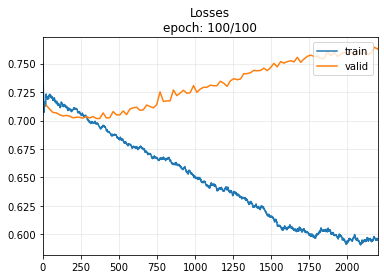

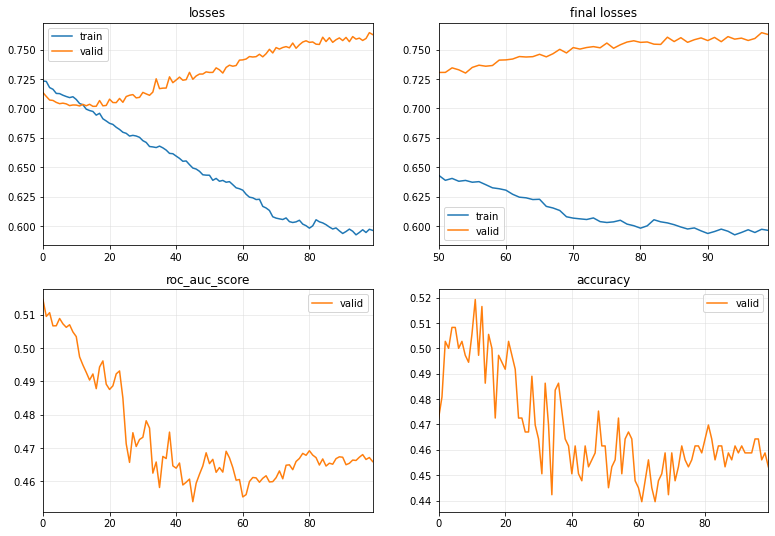


Elapsed time: 69.63782835006714


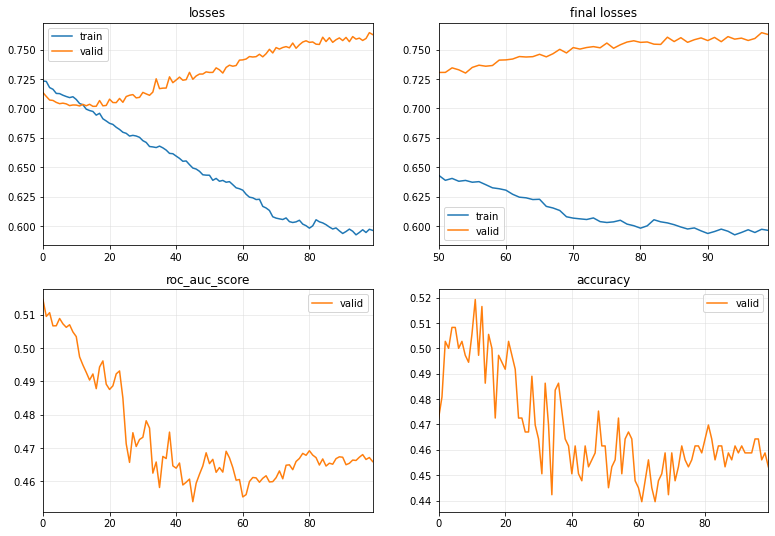

In [18]:
model = TST(dls.vars, dls.c, dls.len, dropout=.3)
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropyFlat(), metrics=[RocAucBinary(), accuracy],  cbs=ShowGraphCallback2())
start = time.time()
learn.fit_one_cycle(n_epochs, lr_max=1e-4)
print('\nElapsed time:', time.time() - start)
learn.plot_metrics()
beep()

## TST with Dropout and FC Dropout

epoch,train_loss,valid_loss,roc_auc_score,accuracy,time
0,0.883274,0.693119,0.507393,0.521978,00:00
1,0.901511,0.694048,0.511196,0.513736,00:00
2,0.881974,0.694378,0.510618,0.519231,00:00
3,0.891362,0.694457,0.513083,0.497253,00:00
4,0.898460,0.695304,0.513174,0.500000,00:00
5,0.881617,0.696322,0.514452,0.500000,00:00
6,0.890218,0.696002,0.514878,0.500000,00:00
7,0.881001,0.697231,0.512596,0.494505,00:00
8,0.876463,0.697339,0.514269,0.494505,00:00
9,0.867558,0.701435,0.518346,0.486264,00:00


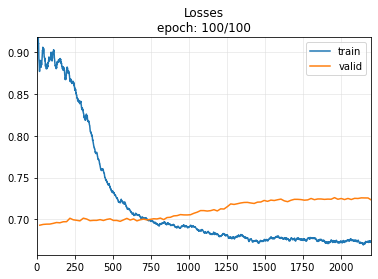

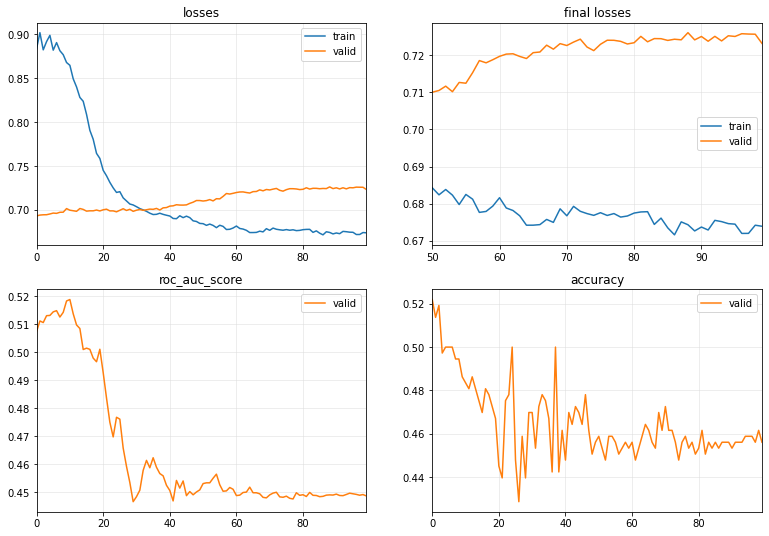


Elapsed time: 69.3781533241272


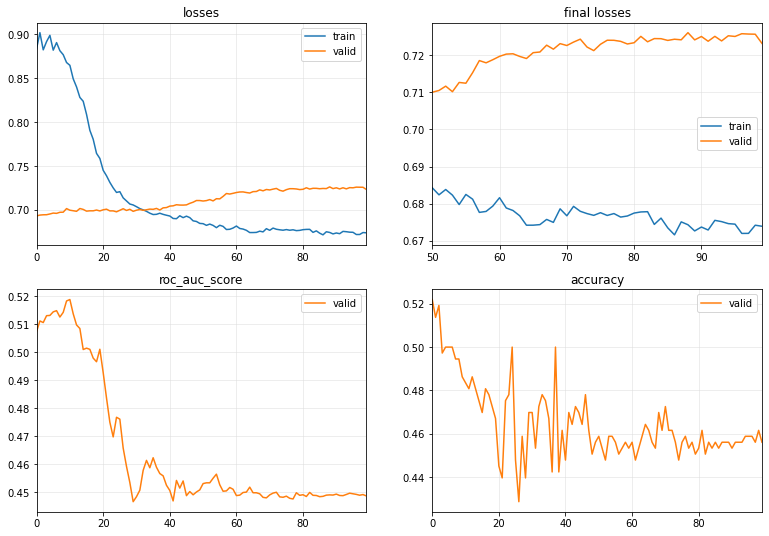

In [19]:
model = TST(dls.vars, dls.c, dls.len, dropout=.3, fc_dropout=.8)
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropyFlat(), metrics=[RocAucBinary(), accuracy],  cbs=ShowGraphCallback2())
start = time.time()
learn.fit_one_cycle(n_epochs, lr_max=1e-4)
print('\nElapsed time:', time.time() - start)
learn.plot_metrics()
beep()

## TST with Increased Dropout

epoch,train_loss,valid_loss,roc_auc_score,accuracy,time
0,1.002841,0.714996,0.482141,0.500000,00:00
1,0.971381,0.716867,0.482506,0.491758,00:00
2,0.965800,0.716365,0.484118,0.497253,00:00
3,0.973222,0.715472,0.484636,0.491758,00:00
4,0.988141,0.714829,0.483936,0.483516,00:00
5,0.985202,0.714217,0.483844,0.483516,00:00
6,0.972516,0.714033,0.483175,0.475275,00:00
7,0.968866,0.713539,0.483966,0.475275,00:00
8,0.955197,0.713176,0.483388,0.478022,00:00
9,0.970646,0.713422,0.483814,0.480769,00:00


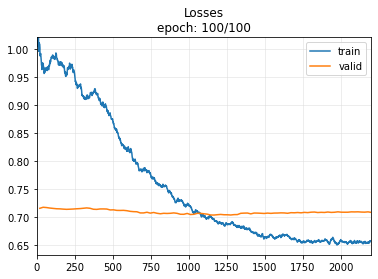

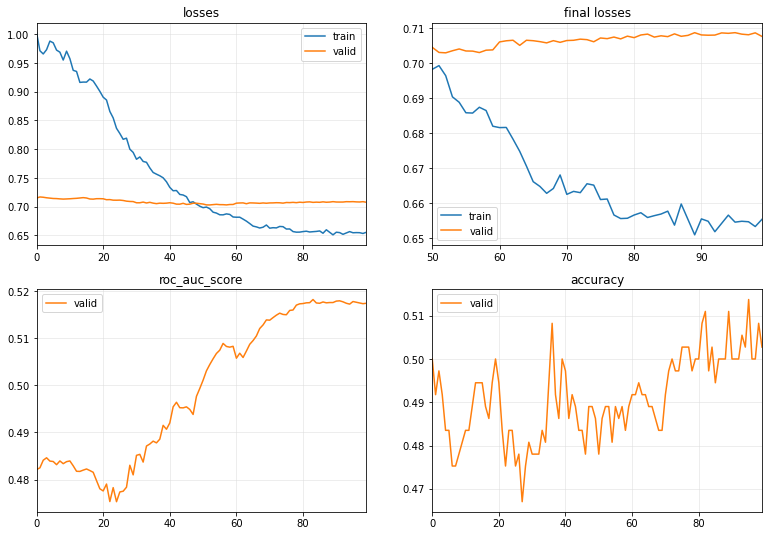

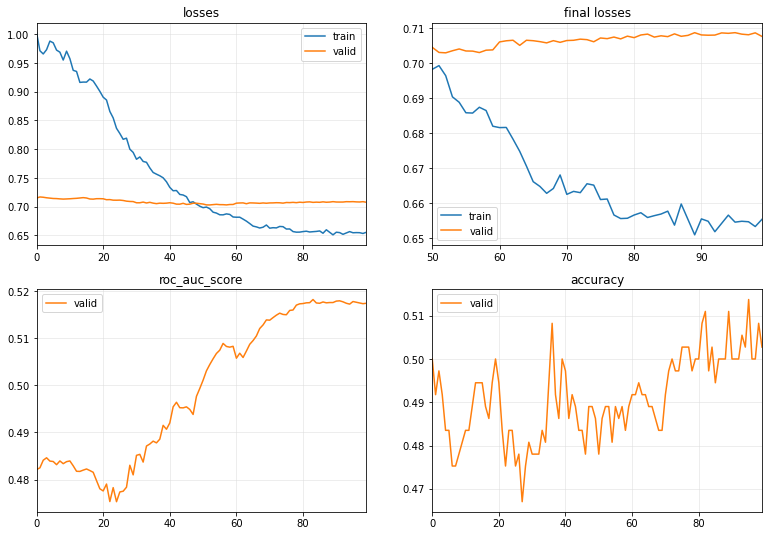

In [42]:
model = TST(dls.vars, dls.c, dls.len, dropout=0.3, fc_dropout=0.9)
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropyFlat(), metrics=[RocAucBinary(), accuracy],  cbs=ShowGraphCallback2())
learn.fit_one_cycle(n_epochs, 1e-4) 
learn.plot_metrics()
beep()

In [47]:
dsid = "dropoutinc"
torch.save(model.state_dict(), f'TST_{dsid}.pth')